In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [4]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_split=0.2, batch_size=64, verbose=2)

Epoch 1/10
750/750 - 4s - loss: 0.4488 - accuracy: 0.8419 - val_loss: 0.3571 - val_accuracy: 0.8714 - 4s/epoch - 6ms/step
Epoch 2/10
750/750 - 3s - loss: 0.2996 - accuracy: 0.8926 - val_loss: 0.2979 - val_accuracy: 0.8925 - 3s/epoch - 4ms/step
Epoch 3/10
750/750 - 3s - loss: 0.2606 - accuracy: 0.9046 - val_loss: 0.2655 - val_accuracy: 0.9047 - 3s/epoch - 4ms/step
Epoch 4/10
750/750 - 3s - loss: 0.2318 - accuracy: 0.9166 - val_loss: 0.2619 - val_accuracy: 0.9052 - 3s/epoch - 4ms/step
Epoch 5/10
750/750 - 4s - loss: 0.2093 - accuracy: 0.9240 - val_loss: 0.2647 - val_accuracy: 0.9057 - 4s/epoch - 5ms/step
Epoch 6/10
750/750 - 3s - loss: 0.1902 - accuracy: 0.9306 - val_loss: 0.2584 - val_accuracy: 0.9067 - 3s/epoch - 5ms/step
Epoch 7/10
750/750 - 3s - loss: 0.1743 - accuracy: 0.9359 - val_loss: 0.2567 - val_accuracy: 0.9076 - 3s/epoch - 4ms/step
Epoch 8/10
750/750 - 3s - loss: 0.1578 - accuracy: 0.9433 - val_loss: 0.2418 - val_accuracy: 0.9160 - 3s/epoch - 4ms/step
Epoch 9/10
750/750 - 3s 

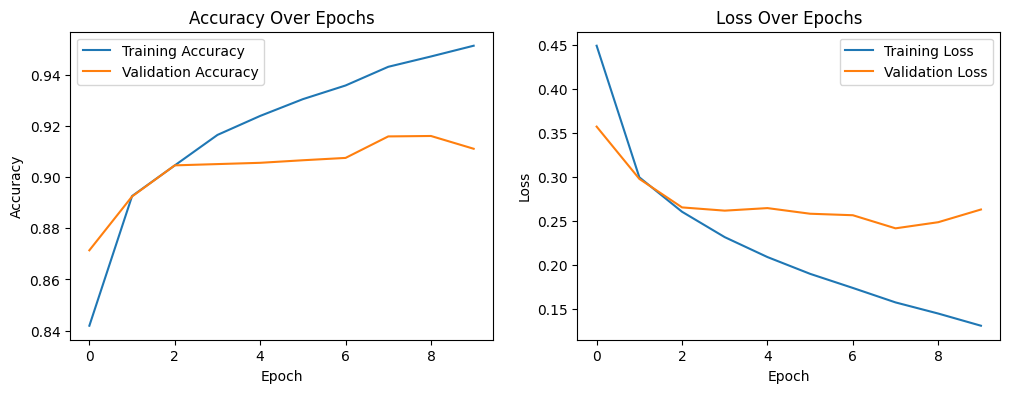

In [7]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [8]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

313/313 - 1s - loss: 0.2779 - accuracy: 0.9092 - 1s/epoch - 5ms/step
Test Loss: 0.2779, Test Accuracy: 0.9092
